# Example notebook

In this example notebook we are going to plot root mean square fluctuation
([RMSF](https://en.wikipedia.org/wiki/Mean_squared_displacement))
obtained from an MD simulation. We are going to correlate the RMSF with the 
with the secondary structure.

## Preparations

### Loading modules and data to plot

First, let's load the neccessary modules and data to plot.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import secstructartist as ssa

# Load RMSF data: 1st column - residue indices, 2nd column -RMSF values
rmsfdata = np.loadtxt("rmsf.dat", comments="#")
rmsfdata.shape

(162, 2)

### Obtaining secondary structure annotations for your protein

For obtaining secondary structure information, tools like 
[DSSP](http://bioinformatica.isa.cnr.it/SUSAN/NAR2/dsspweb.html) or 
[STRIDE](https://webclu.bio.wzw.tum.de/stride/) can be used. 
But also [PyMOL](https://pymol.org/2/) can be used to obtain secondary structure
by selecting your whole protein and running the following command in the PyMOL 
command line:

```
# Iterate over Calpha and print secondary structure annotations
iterate sele and n. CA, print(ss or "L", end="")
```

However, you obtain the secondary structure annotations, you will need to 
provide them either as a `str` (one character per residue) or a `list` 
(one element per residue).

In [2]:
# Secondary structure string
secstruct_str = (
    "LLLSSSSSSSLLSSSSSSSSSSLLLLLHHHHHHHHHHHHLLLLLLLLLLLLSSSSLLS"
    "SSSSLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLSSSSSLLLLLLLLLLLSSSSLLL"
    "LHHHLLLLLLSSSSSSLHHHHHHHHHHLLLLLLLLLLSSSSSSSLL"
    )

## Some examples

### The simplest possible use case

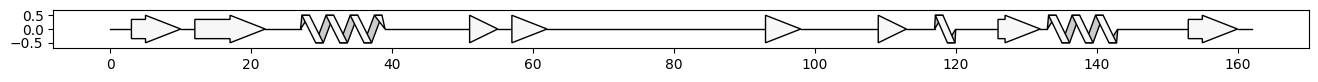

In [3]:
# Plot RMSF data
fig, _ = ssa.draw(secstruct_str)

### RMSF plot with associated secondary structure

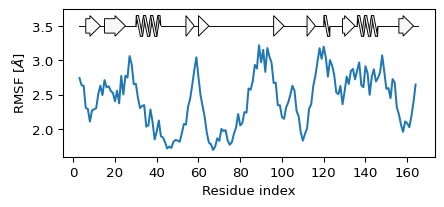

In [4]:
# Generate figure and axis
fig, ax = plt.subplots(figsize=(5,2), dpi=96)

# Plot RMSF data
ax.plot(rmsfdata[:,0], rmsfdata[:,1])
ax.set_ylabel("RMSF [$\AA$]")
ax.set_xlabel("Residue index")

# Include secondary structure scheme above the plot
ssa.draw(secstruct_str, xpos=rmsfdata[:,0], 
            ypos=3.5, height=.3, linewidth=.7, ax=ax)

plt.show()

### Modifying the secondary structure plot

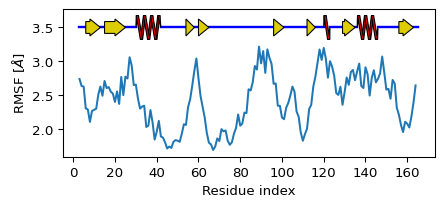

In [5]:
# Initialize a custom SecStructArtist istance to modify settings 
artist = ssa.SecStructArtist()
# Set global settings
artist.height = .35
artist.linewidth = .8
# Set settings of "H" - Helices
artist["H"].fillcolor = (.9, 0., 0.)
artist["H"].shadecolor = (.7, 0., 0.)
# Set settings of "S" - beta-Sheets
artist["S"].fillcolor = "#dc0"
artist["S"].height = .25
# Set settings of "L" - loop
artist["L"].linecolor = "blue"
artist["L"].linewidth = 1.8

# Generate figure and axis
fig, ax = plt.subplots(figsize=(5,2), dpi=96)

# Plot RMSF data
ax.plot(rmsfdata[:,0], rmsfdata[:,1])
ax.set_ylabel("RMSF [$\AA$]")
ax.set_xlabel("Residue index")

# Include secondary structure scheme above the plot
artist.draw(secstruct_str, xpos=rmsfdata[:,0], ypos=3.5, ax=ax)

plt.show()

# Modifying secondary stucture labels

By default the `SecStructArtist` recognizes four secondary structure labels:
* H - Helix
* S - Sheet
* H - Loop

To adapt the software to use custom labels (e.g., Dssp labels) you can overwrite
the artists attribute.

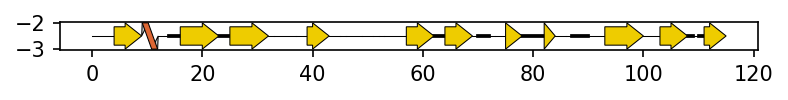

In [6]:
from secstructartist.artists import HelixArtist, SheetArtist, LoopArtist

custom_str = (
    "ccccEEEEEGGGScTTEEEEEEETTEEEEEEEcSSSSccEEEESScSSSc"
	"cScSSSSEEEEETTEEEEEcTTSccEEETTTTEESScTTTcccEEEEEEE"
    "cccEEEEETcTEEEE"
)

# Initialize a custom SecStructArtist istance to modify settings 
artist2 = ssa.SecStructArtist()
artist2.linewidth = .5

# Remove the default artists
del artist2["H"]
del artist2["S"]
del artist2["L"]

# Add custom artists for DSSP codes
artist2["H"] = HelixArtist(fillcolor="#d00") # alpha-helix
artist2["G"] = HelixArtist(fillcolor="#d63") # 3-10 helix
artist2["I"] = HelixArtist(fillcolor="#d37") # pi- helix
artist2["E"] = SheetArtist(fillcolor="#ec0", arrow_length=3) # extended strand
artist2["B"] = SheetArtist(fillcolor="#c91", arrow_length=3) # isolated beta-bridge
artist2["T"] = LoopArtist(fillcolor="#00e", linewidth=1.8)   # H-bonded turn
artist2["S"] = LoopArtist(fillcolor="k") # bend
artist2["c"] = LoopArtist(fillcolor="k") # coil

# Plot with the new artist
fig, ax = plt.subplots(figsize=(6,.25), dpi=150)
artist2.draw(custom_str, ypos=-2.5, ax=ax)
plt.show()

## Let's end with a little flex ...

.. let's add a tiny shadow underneath the representation. ;)

(<Figure size 480x192 with 2 Axes>,
 [DrawnLoop(start:3.7, stop:5.7, lines:1, patches:0),
  DrawnSheet(start:6.7, stop:12.7, lines:0, patches:1),
  DrawnLoop(start:13.7, stop:14.7, lines:1, patches:0),
  DrawnSheet(start:15.7, stop:24.7, lines:0, patches:1),
  DrawnLoop(start:25.7, stop:29.7, lines:1, patches:0),
  DrawnHelix(start:30.7, stop:41.7, lines:0, patches:5),
  DrawnLoop(start:42.7, stop:53.7, lines:1, patches:0),
  DrawnSheet(start:54.7, stop:57.7, lines:0, patches:1),
  DrawnLoop(start:58.7, stop:59.7, lines:1, patches:0),
  DrawnSheet(start:60.7, stop:64.7, lines:0, patches:1),
  DrawnLoop(start:65.7, stop:95.7, lines:1, patches:0),
  DrawnSheet(start:96.7, stop:100.7, lines:0, patches:1),
  DrawnLoop(start:101.7, stop:111.7, lines:1, patches:0),
  DrawnSheet(start:112.7, stop:115.7, lines:0, patches:1),
  DrawnLoop(start:116.7, stop:119.7, lines:1, patches:0),
  DrawnHelix(start:120.7, stop:122.7, lines:0, patches:2),
  DrawnLoop(start:123.7, stop:128.7, lines:1, patches:

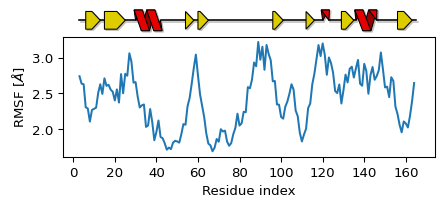

In [7]:
import copy

# Initialize a custom SecStructArtist istance to modify settings 
artist = ssa.SecStructArtist()
artist.height = .35
artist.linewidth = .8
artist.zorder = 10
artist["H"].fillcolor = (.9, 0., 0.)
artist["H"].shadecolor = (.6, 0., 0.)
artist["H"].ribbon_period = 6   # Number of residues for which one helix turn is draw
artist["H"].ribbon_width = 4    # Width of the helix drawing
artist["S"].height = .3
artist["S"].arrow_length = 4    # Number of residues for the arrow head
artist["S"].arrow_ratio = 1.    # Width of arrow-body relative to arrow head
artist["S"].fillcolor = "#dc0"
artist["L"].linewidth = 1.2

# Initialize a second custom SecStructArtist istance
shader = copy.deepcopy(artist)
shader.zorder = 9
shader["H"].linecolor  = "0.75"
shader["H"].fillcolor  = "0.75"
shader["H"].shadecolor = "0.75"
shader["S"].linecolor  = "0.75"
shader["S"].fillcolor  = "0.75"
shader["L"].linecolor  = "0.75"

# Generate figure and axis
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(5,2), dpi=96, sharex=True,
    gridspec_kw={"height_ratios": [1,5], "hspace": .05})

# Plot RMSF data
ax1.plot(rmsfdata[:,0], rmsfdata[:,1])
ax1.set_ylabel("RMSF [$\AA$]")
ax1.set_xlabel("Residue index")

# Include secondary structure scheme above the plot
ax0.axis('off')
artist.draw(secstruct_str, xpos=rmsfdata[:,0], ypos=0, ax=ax0)
shader.draw(secstruct_str, xpos=rmsfdata[:,0]+.7, ypos=-.02, ax=ax0)